In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("Full_HD.csv")
df.head()

,Herb,Disease,Association
0,7219,5001,1
1,2452,13609,0
2,5727,7189,0
3,6320,7281,0
4,1857,955,0


In [4]:
df["Association"] = pd.to_numeric(df["Association"], errors='coerce').astype(int)
df.columns


Index(['Herb', 'Disease', 'Association'], dtype='object')

In [5]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=["Association"]),df["Association"],test_size=0.2,random_state=42)

In [10]:
k_values = list(range(1, 21))  # k values from 1 to 20
accuracies = []

# Loop through different k values
for k in k_values:
    # Initialize the KNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

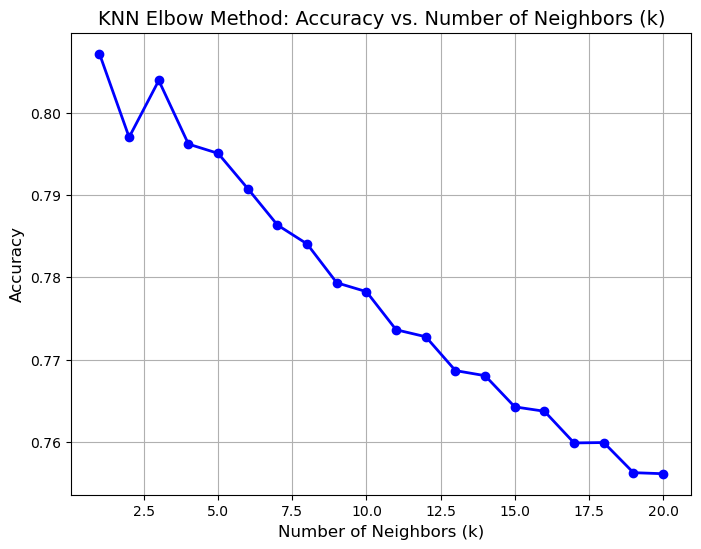

In [11]:
# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('KNN Elbow Method: Accuracy vs. Number of Neighbors (k)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.show()

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)

In [7]:
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

In [8]:
# Evaluate the model using accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # For binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8038993724049316
Precision: 0.7835757243530248
Recall: 0.8402054089611781
F1 Score: 0.8109030809938479


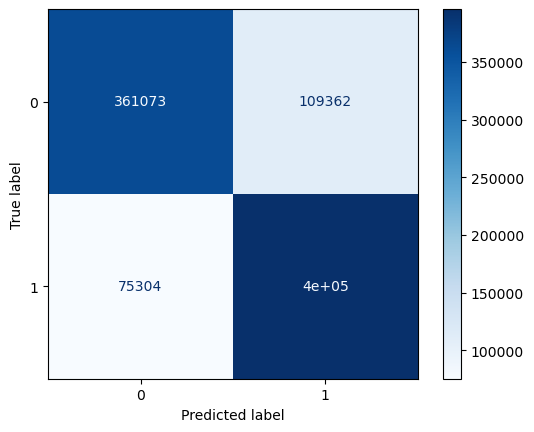

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot(cmap='Blues')
plt.show()